In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
df = pd.read_csv('data/bikes_rent.csv.gz', compression='gzip')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


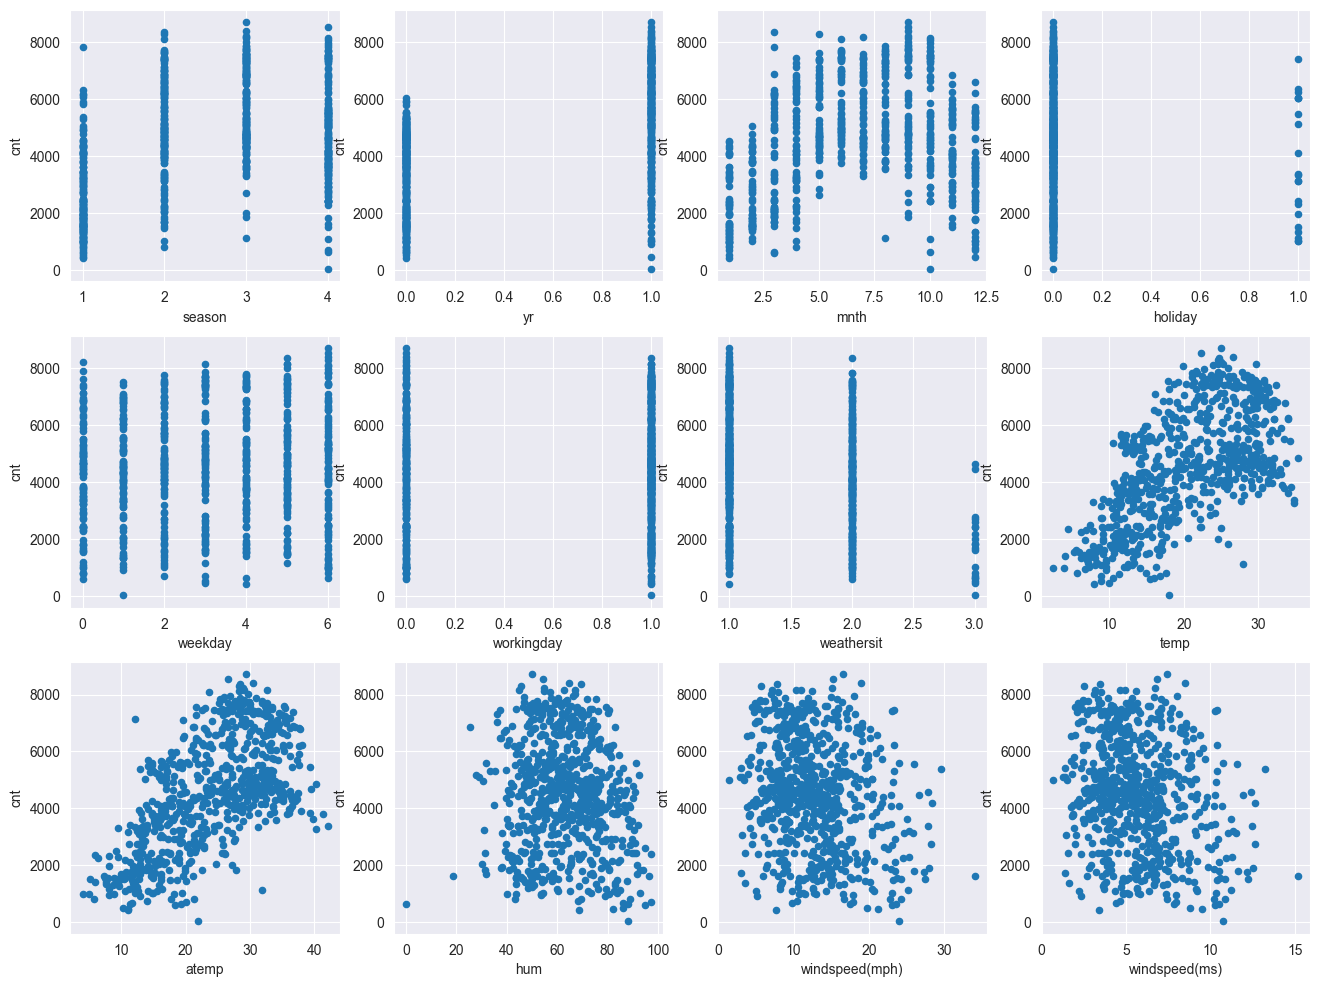

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

По графикам видно, что количество прокатов велосипедов зависит линейно от температуры и ощущаемой температуры


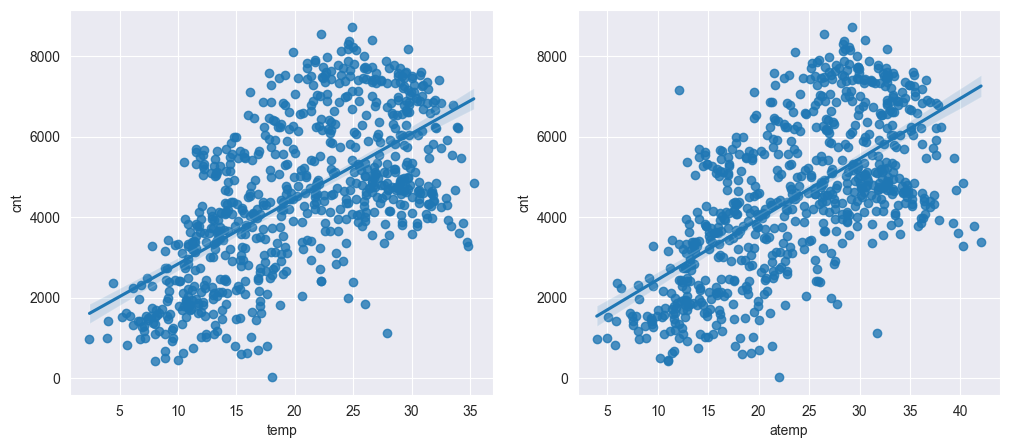

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x="temp", y="cnt", data=df, ax=axes[0])
sns.regplot(x="atemp", y="cnt", data=df, ax=axes[1])
print('По графикам видно, что количество прокатов велосипедов зависит линейно от температуры и ощущаемой температуры')

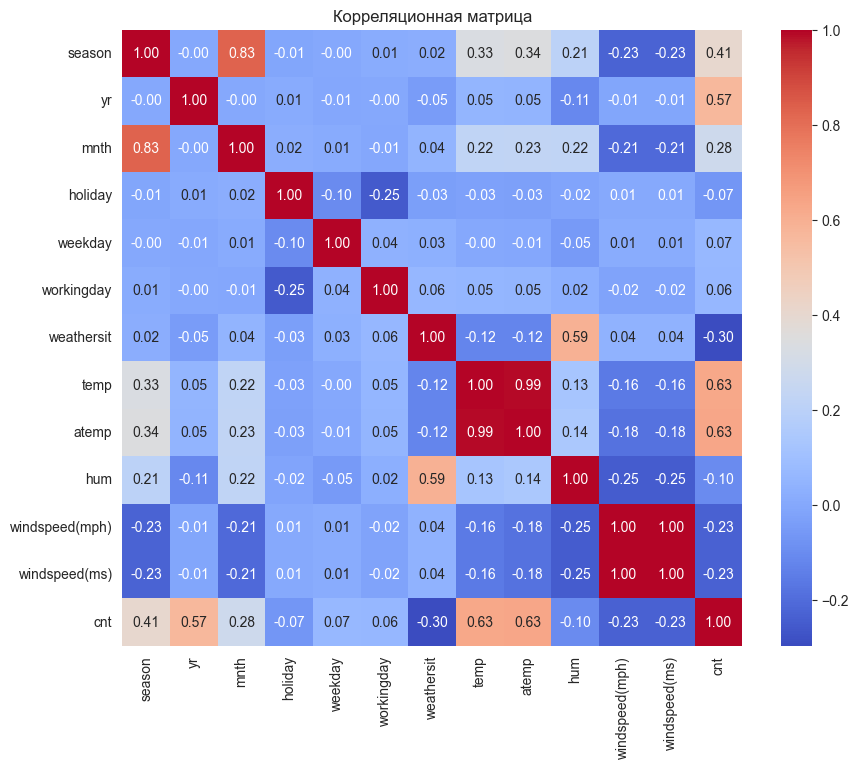

Больше всего коррелирует temp и atemp, yr, season
Меньше всего коррелирует holiday, weekday, workingday, hum, windspeed(mph), windspeed(ms)


In [75]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()
print('Больше всего коррелирует temp и atemp, yr, season')
print('Меньше всего коррелирует holiday, weekday, workingday, hum, windspeed(mph), windspeed(ms)')

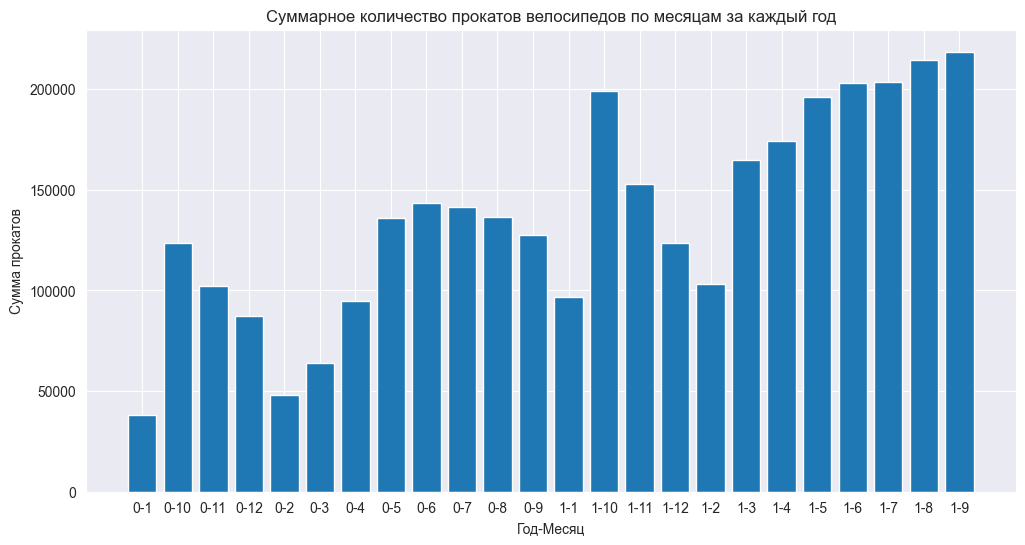

В 2011 году прокатов было меньше, чем в 2012 году. Это может быть связано с тем, что в 2011 году велосипедные прокаты были менее популярны, чем в 2012 году, или с тем, что в 2011 году было меньше доступных велосипедов, чем в 2012 году


In [76]:
df['monYear'] = df['yr'].astype(str) + '-' + df['mnth'].astype(str)

monthly_rentals = df.groupby('monYear')['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(monthly_rentals['monYear'], monthly_rentals['cnt'])
plt.xlabel('Год-Месяц')
plt.ylabel('Сумма прокатов')
plt.title('Суммарное количество прокатов велосипедов по месяцам за каждый год')
plt.show()

print('В 2011 году прокатов было меньше, чем в 2012 году. Это может быть связано с тем, что в 2011 году велосипедные прокаты были менее популярны, чем в 2012 году, или с тем, что в 2011 году было меньше доступных велосипедов, чем в 2012 году')

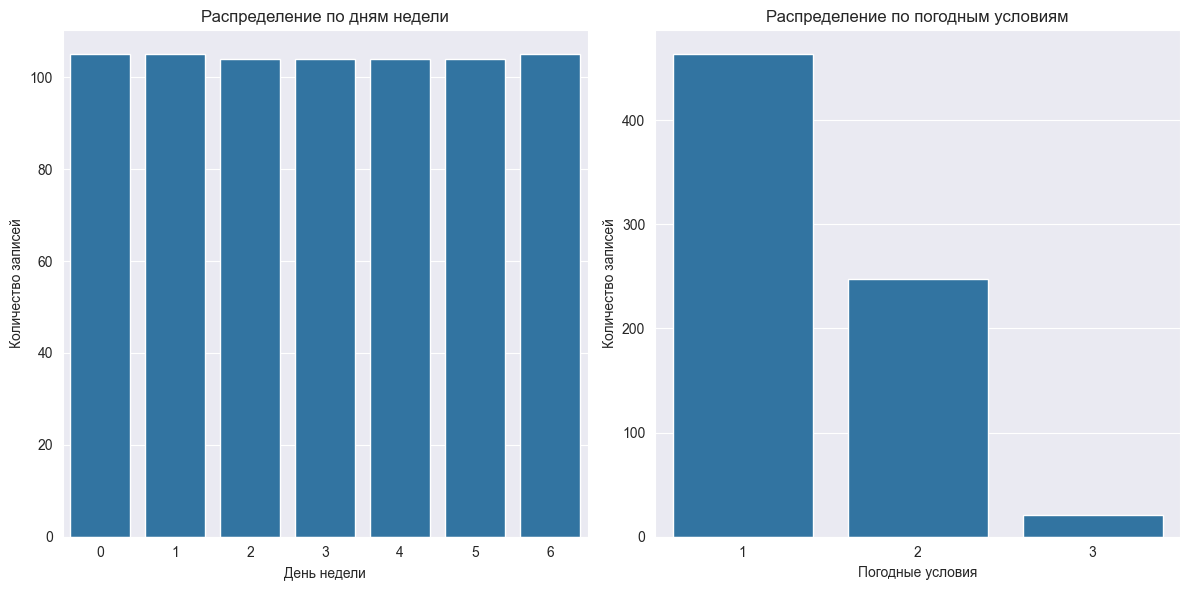

Датасет формировался равномерно по дням недели. Автор датасета указывает, что оценка благоприятности погоды распределяется от 1 (чистый, ясный день) до 4 (ливень, уман), однако в датасете нет записей с оценкой 4. Поэтому распределение по погодным условиям не равномерное
Распределение значений признака weekday называется равномерным


In [78]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)

ax1 = plt.subplot(gs[0])
sns.countplot(x='weekday', data=df, ax=ax1)
ax1.set_xlabel('День недели')
ax1.set_ylabel('Количество записей')
ax1.set_title('Распределение по дням недели')

ax2 = plt.subplot(gs[1])
sns.countplot(x='weathersit', data=df, ax=ax2)
ax2.set_xlabel('Погодные условия')
ax2.set_ylabel('Количество записей')
ax2.set_title('Распределение по погодным условиям')

plt.tight_layout()
plt.show()

df['weathersit'].unique()
print('Датасет формировался равномерно по дням недели. Автор датасета указывает, что оценка благоприятности погоды распределяется от 1 (чистый, ясный день) до 4 (ливень, уман), однако в датасете нет записей с оценкой 4. Поэтому распределение по погодным условиям не равномерное')
print('Распределение значений признака weekday называется равномерным')

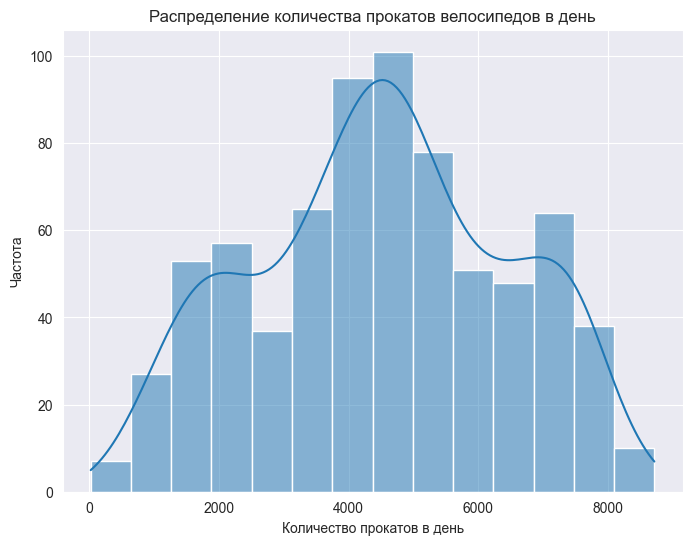

В среднем прокатов в день бывает около 5000
Полученное распределение называется нормальным (Гауссовым). Симметричное, пик вокруг среднего значения, хвосты с обеих сторон


In [86]:
plt.figure(figsize=(8, 6))
sns.histplot(df['cnt'], kde=True)
plt.xlabel('Количество прокатов в день')
plt.ylabel('Частота')
plt.title('Распределение количества прокатов велосипедов в день')
plt.show()

print('В среднем прокатов в день бывает около 5000')
print('Полученное распределение называется нормальным (Гауссовым). Симметричное, пик вокруг среднего значения, хвосты с обеих сторон')

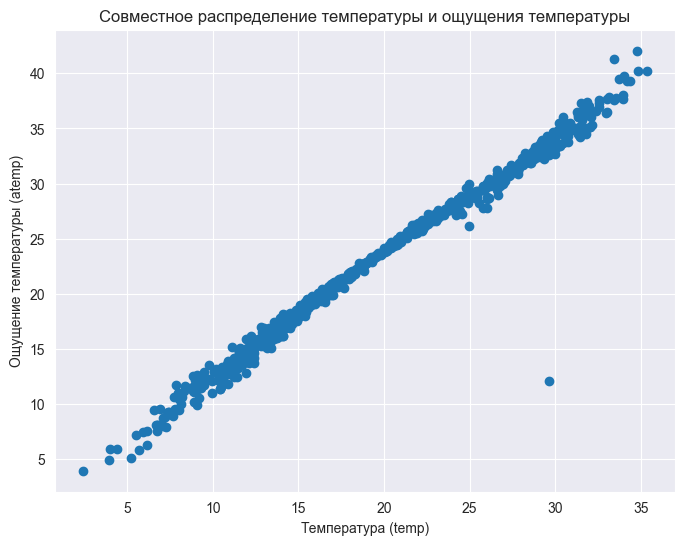

На первый взгляд, этот график выглядит нормальным и логичным, поскольку "ощущение температуры" (atemp) обычно должно быть близким к реальной температуре (temp).Обычно ощущение температуры (atemp) создается на основе фактической температуры и других факторов. Линейная зависимость указывает на корректное создание этого признака


In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(df['temp'], df['atemp'])
plt.xlabel('Температура (temp)')
plt.ylabel('Ощущение температуры (atemp)')
plt.title('Совместное распределение температуры и ощущения температуры')
plt.show()

print('На первый взгляд, этот график выглядит нормальным и логичным, поскольку "ощущение температуры" (atemp) обычно должно быть близким к реальной температуре (temp).Обычно ощущение температуры (atemp) создается на основе фактической температуры и других факторов. Линейная зависимость указывает на корректное создание этого признака')

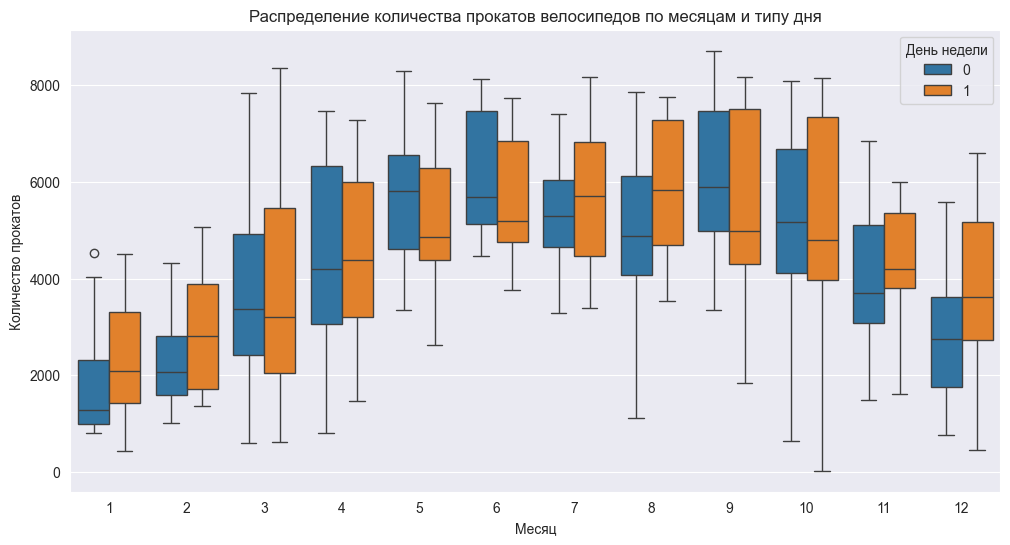

В некоторые месяцы года может быть сезонный спрос на велосипеды, связанный с праздниками, каникулами или событиями в регионе. В таких случаях, люди могут чаще брать велосипеды в выходные. Также может влиять погода, мероприятия и фестивали, а также местоположение - разные регионы, разный спрос


In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')
plt.title('Распределение количества прокатов велосипедов по месяцам и типу дня')
plt.legend(title='День недели')
plt.show()

print('В некоторые месяцы года может быть сезонный спрос на велосипеды, связанный с праздниками, каникулами или событиями в регионе. В таких случаях, люди могут чаще брать велосипеды в выходные. Также может влиять погода, мероприятия и фестивали, а также местоположение - разные регионы, разный спрос')